ASOS

Mr-Porter

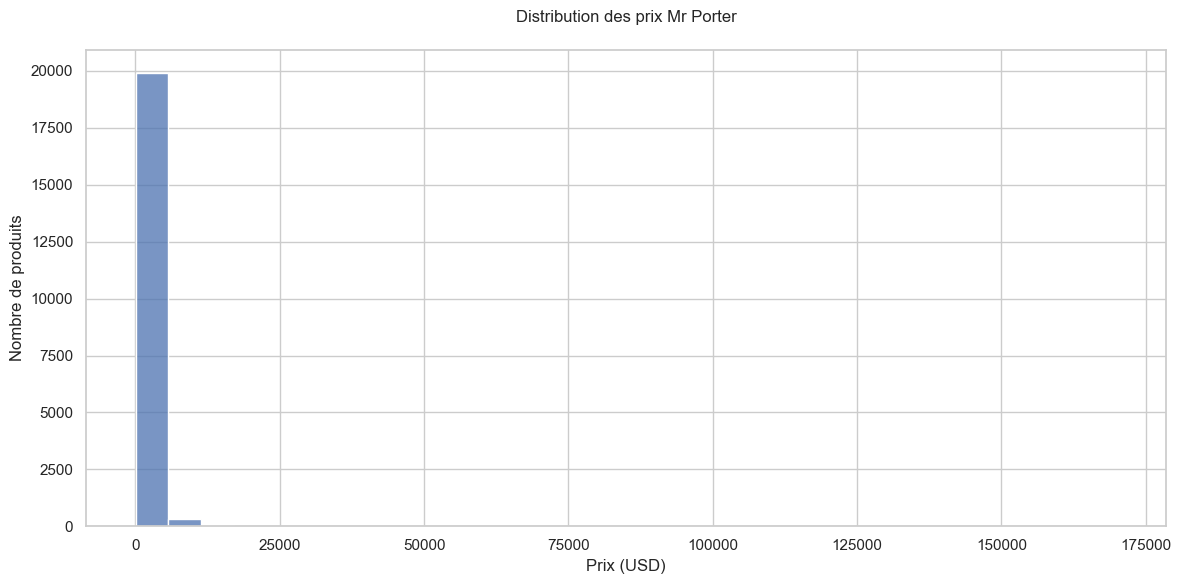

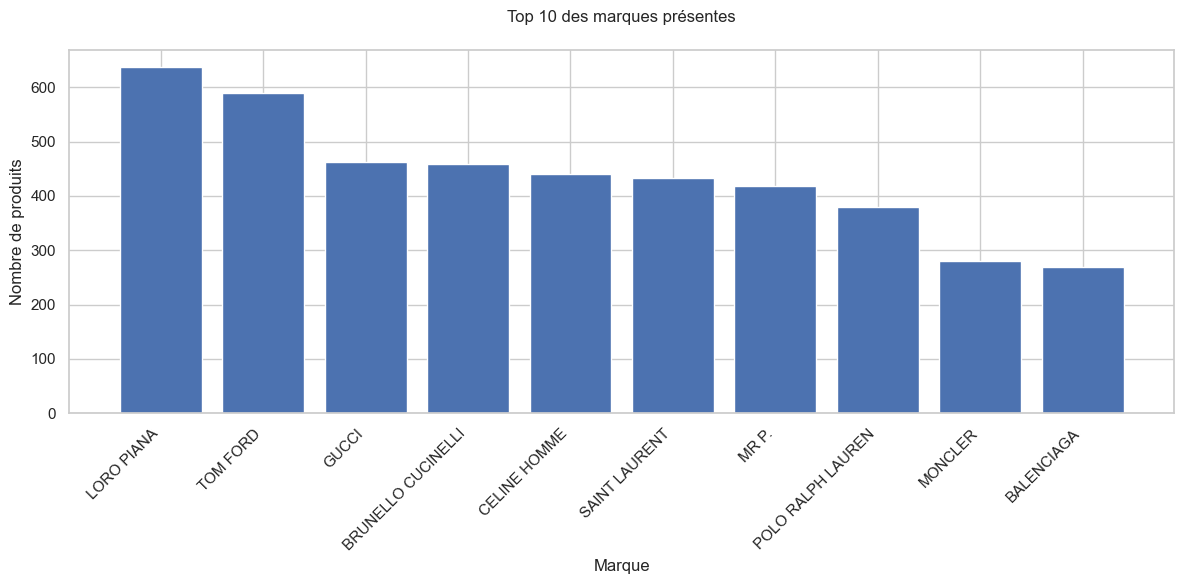

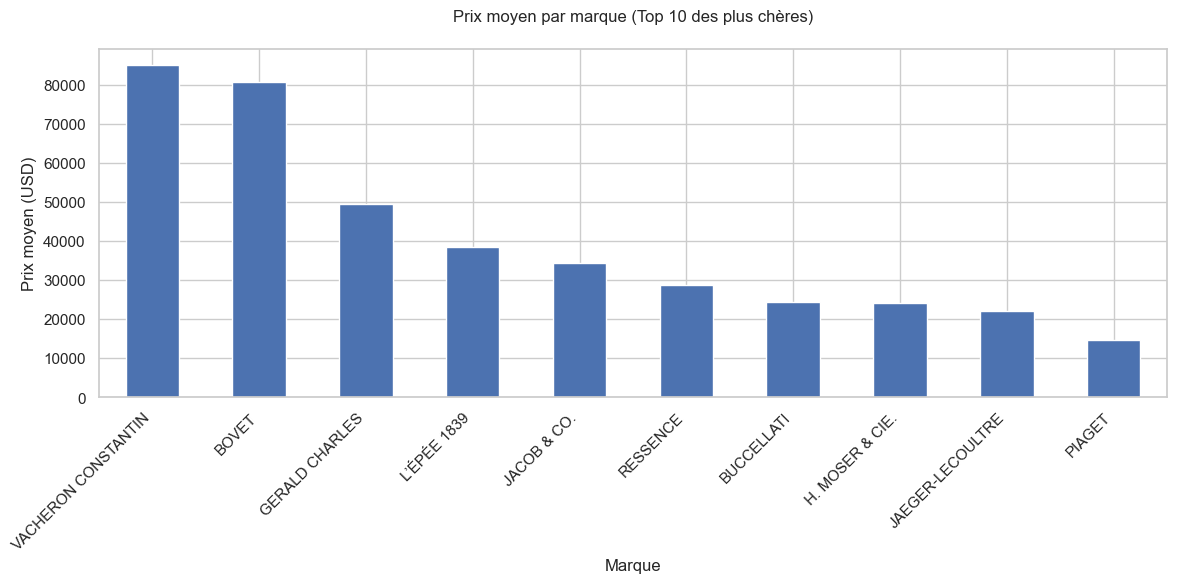

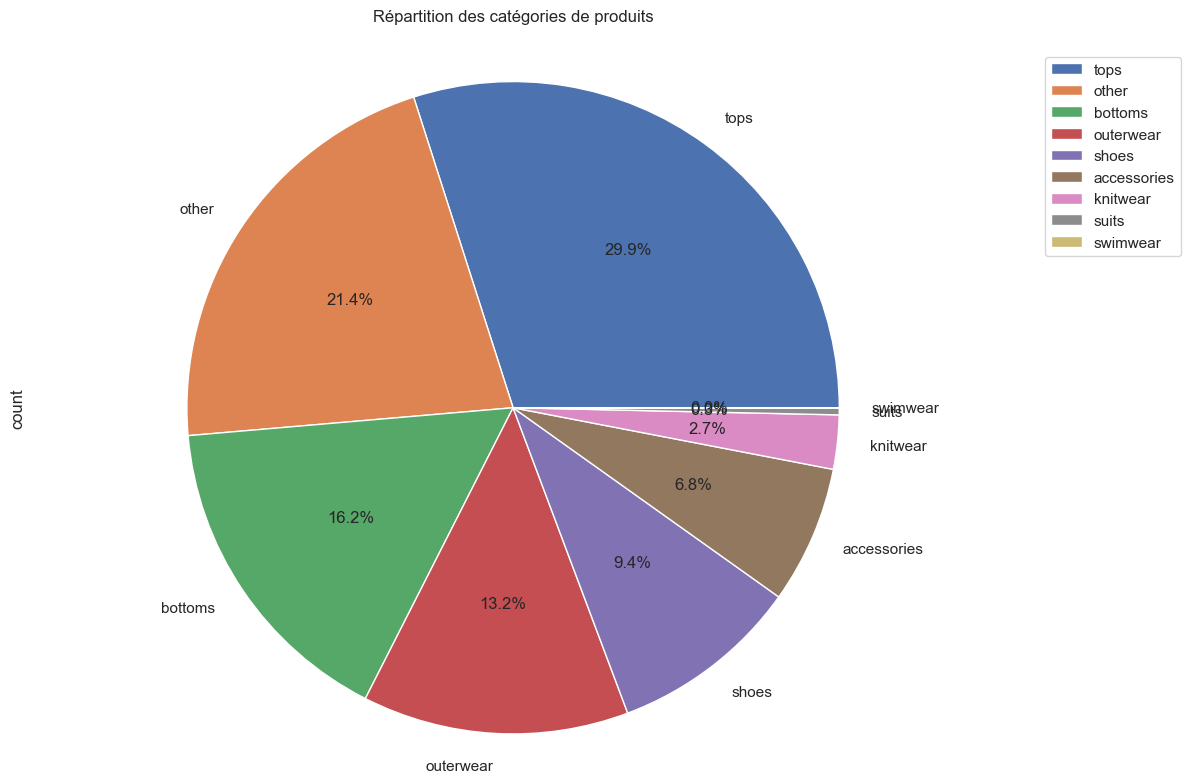

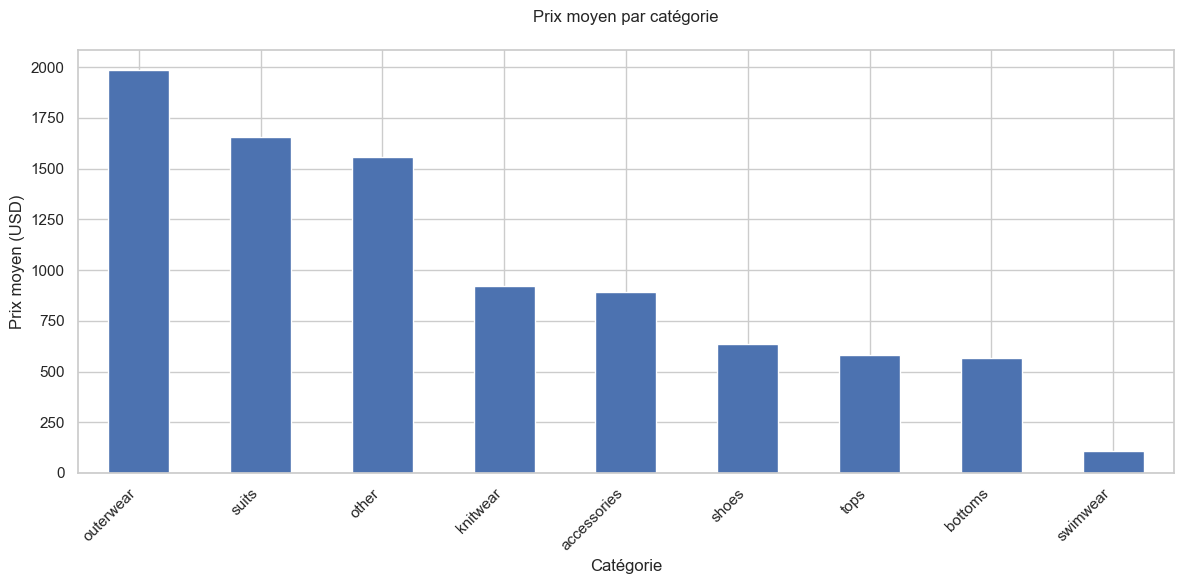

<Figure size 1500x800 with 0 Axes>

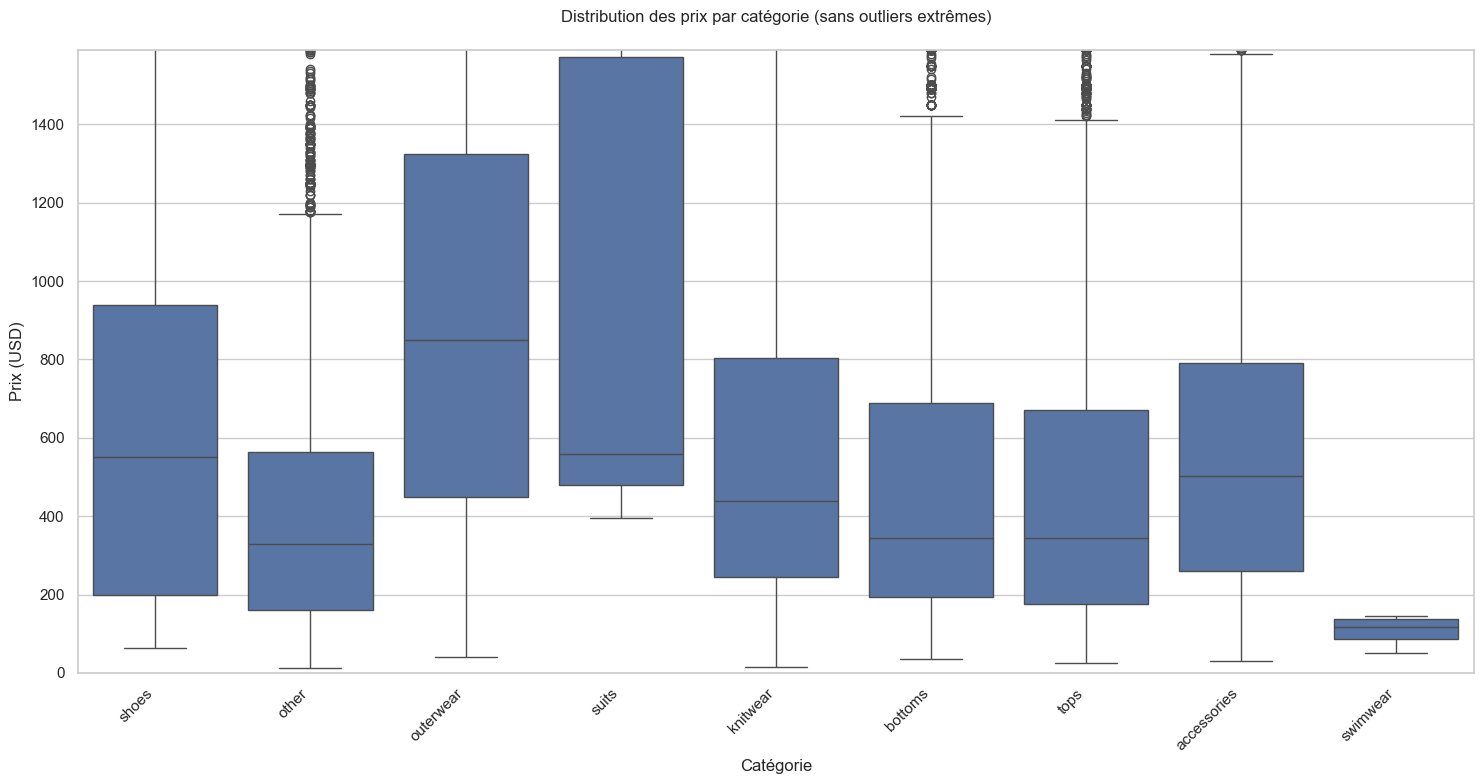


Statistiques principales:
Prix moyen (USD): 1013.14
Prix médian (USD): 460.00
Prix minimum (USD): 14
Prix maximum (USD): 170000
Nombre total de produits: 20347
Nombre de marques uniques: 434
Nombre de catégories: 9

Statistiques par catégorie:
             Nombre de produits  Prix moyen  Prix minimum  Prix maximum  \
category                                                                  
accessories                1388      891.73            30         11200   
bottoms                    3287      566.31            35         10600   
knitwear                    545      923.33            15          6500   
other                      4361     1559.62            14        170000   
outerwear                  2685     1986.30            40         40635   
shoes                      1920      633.73            65          4200   
suits                        67     1658.16           395          8500   
swimwear                      4      107.50            50           145   
tops 

In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")

# Chargement des données
df_porter = pd.read_csv('../data/text/mr-porter.csv')

# 1. Distribution des prix
plt.figure(figsize=(12, 6))
sns.histplot(data=df_porter, x='price_usd', bins=30)
plt.title('Distribution des prix Mr Porter', pad=20)
plt.xlabel('Prix (USD)')
plt.ylabel('Nombre de produits')
plt.tight_layout()
plt.show()

# 2. Top 10 des marques par nombre de produits
plt.figure(figsize=(12, 6))
brand_counts = df_porter['brand'].value_counts()
plt.bar(range(len(brand_counts[:10])), brand_counts[:10])
plt.xticks(range(len(brand_counts[:10])), brand_counts[:10].index, rotation=45, ha='right')
plt.title('Top 10 des marques présentes', pad=20)
plt.xlabel('Marque')
plt.ylabel('Nombre de produits')
plt.tight_layout()
plt.show()

# 3. Prix moyen par marque (top 10 des marques les plus chères)
plt.figure(figsize=(12, 6))
avg_price_by_brand = df_porter.groupby('brand')['price_usd'].mean().sort_values(ascending=False).head(10)
avg_price_by_brand.plot(kind='bar')
plt.title('Prix moyen par marque (Top 10 des plus chères)', pad=20)
plt.xlabel('Marque')
plt.ylabel('Prix moyen (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Extraction des catégories de produits depuis la description
def extract_category(description):
    description = description.lower()
    categories = {
        'outerwear': ['jacket', 'coat', 'blazer', 'outerwear'],
        'tops': ['shirt', 't-shirt', 'sweater', 'hoodie', 'sweatshirt', 'polo'],
        'bottoms': ['pants', 'trousers', 'shorts', 'jeans'],
        'shoes': ['sneakers', 'boots', 'loafers', 'sandals', 'shoes'],
        'accessories': ['bag', 'wallet', 'belt', 'scarf', 'hat', 'gloves'],
        'suits': ['suit', 'tuxedo'],
        'knitwear': ['knit', 'cardigan'],
        'swimwear': ['swim', 'trunks']
    }
    
    for category, keywords in categories.items():
        if any(keyword in description for keyword in keywords):
            return category
    return 'other'

df_porter['category'] = df_porter['description'].apply(extract_category)

# 5. Répartition des catégories de produits
plt.figure(figsize=(12, 8))
df_porter['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des catégories de produits', pad=20)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.tight_layout()
plt.show()

# 6. Prix moyen par catégorie
plt.figure(figsize=(12, 6))
avg_price_by_category = df_porter.groupby('category')['price_usd'].mean().sort_values(ascending=False)
avg_price_by_category.plot(kind='bar')
plt.title('Prix moyen par catégorie', pad=20)
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Box plot des prix par catégorie
# Calcul des statistiques pour identifier les outliers extrêmes
Q1 = df_porter['price_usd'].quantile(0.25)
Q3 = df_porter['price_usd'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(15, 8))
sns.boxplot(x='category', y='price_usd', data=df_filtered)
plt.title('Distribution des prix par catégorie (sans outliers extrêmes)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Catégorie')
plt.ylabel('Prix (USD)')
plt.tight_layout()
plt.show()

# Statistiques principales
stats_summary = {
    'Prix moyen (USD)': df_porter['price_usd'].mean(),
    'Prix médian (USD)': df_porter['price_usd'].median(),
    'Prix minimum (USD)': df_porter['price_usd'].min(),
    'Prix maximum (USD)': df_porter['price_usd'].max(),
    'Nombre total de produits': len(df_porter),
    'Nombre de marques uniques': df_porter['brand'].nunique(),
    'Nombre de catégories': df_porter['category'].nunique()
}

print("\nStatistiques principales:")
for key, value in stats_summary.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

# Statistiques par catégorie
print("\nStatistiques par catégorie:")
category_stats = df_porter.groupby('category').agg({
    'price_usd': ['count', 'mean', 'min', 'max'],
    'brand': 'nunique'
}).round(2)
category_stats.columns = ['Nombre de produits', 'Prix moyen', 'Prix minimum', 'Prix maximum', 'Nombre de marques']
print(category_stats)

# Sauvegarde des statistiques
category_stats.to_csv('../data/text/mr_porter_category_stats.csv')

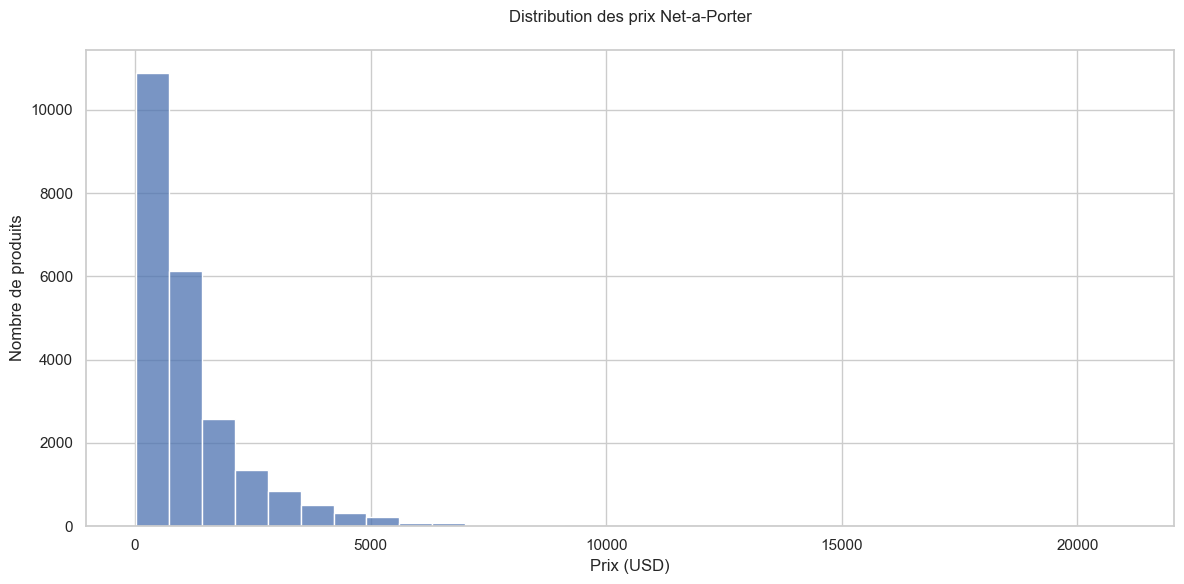

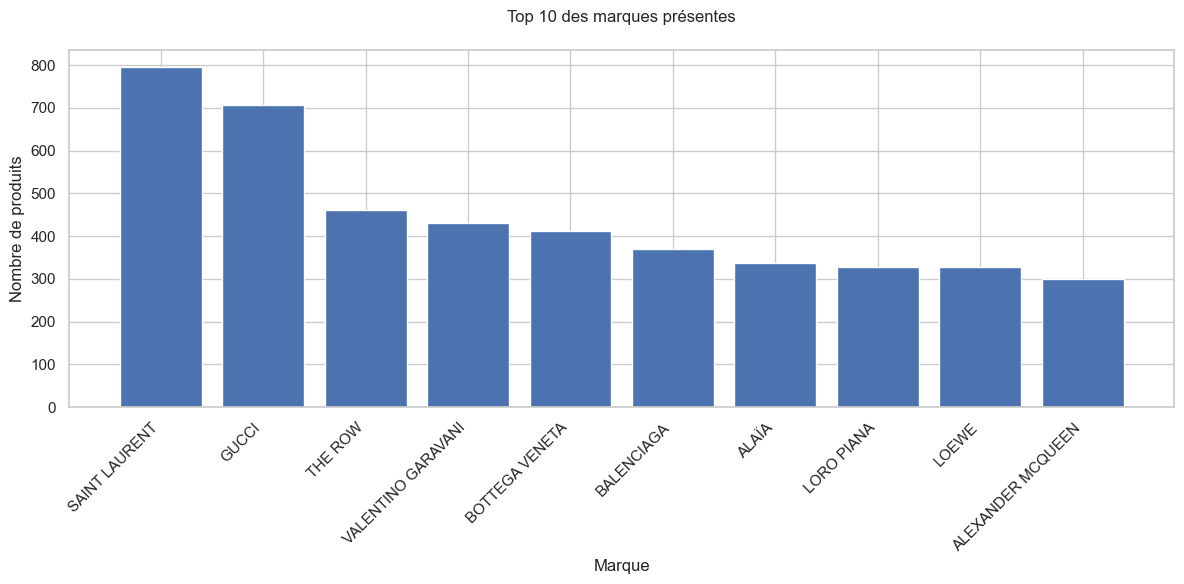

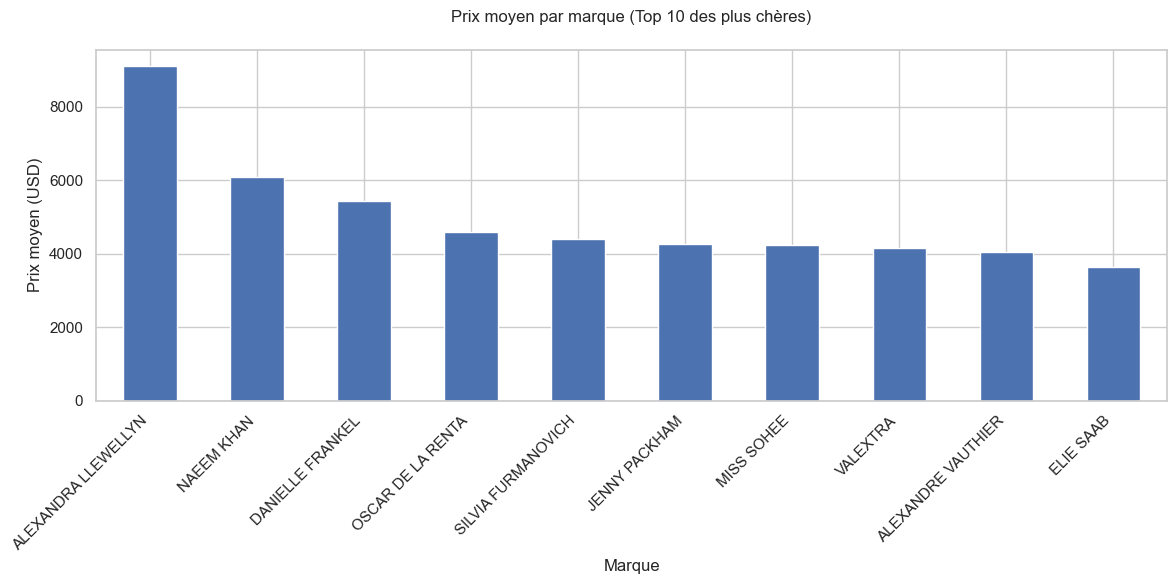

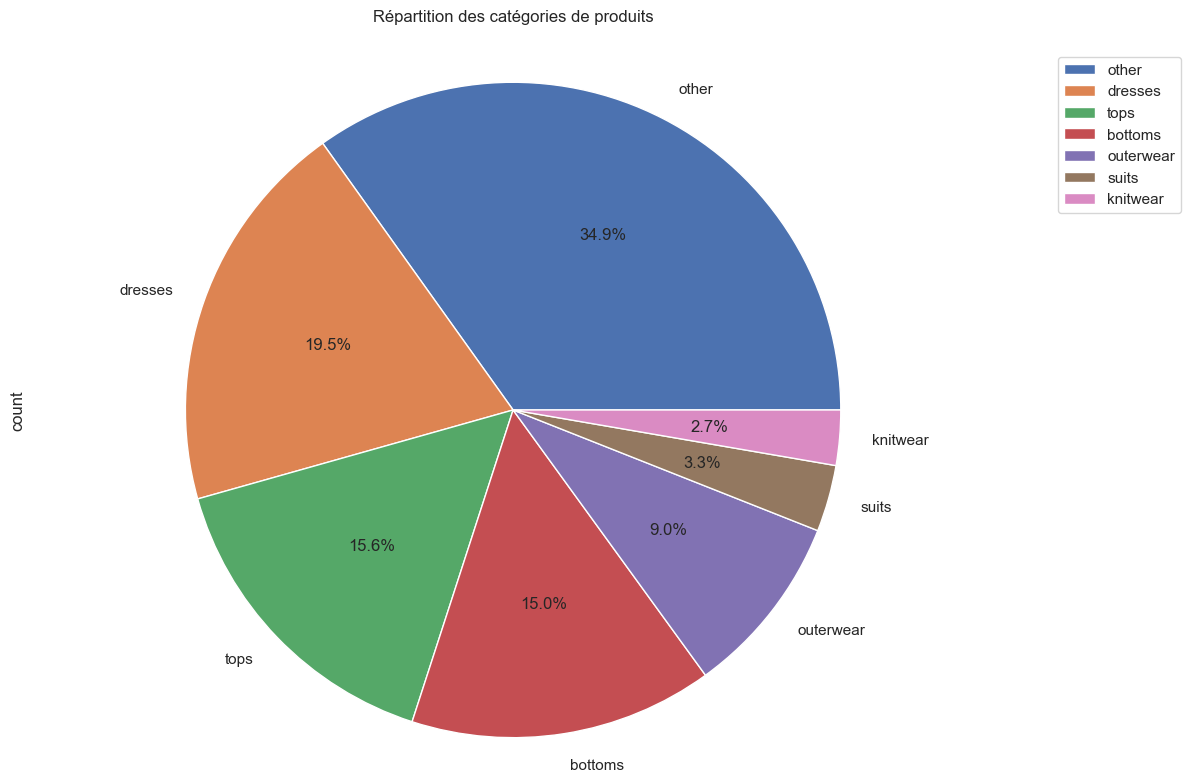

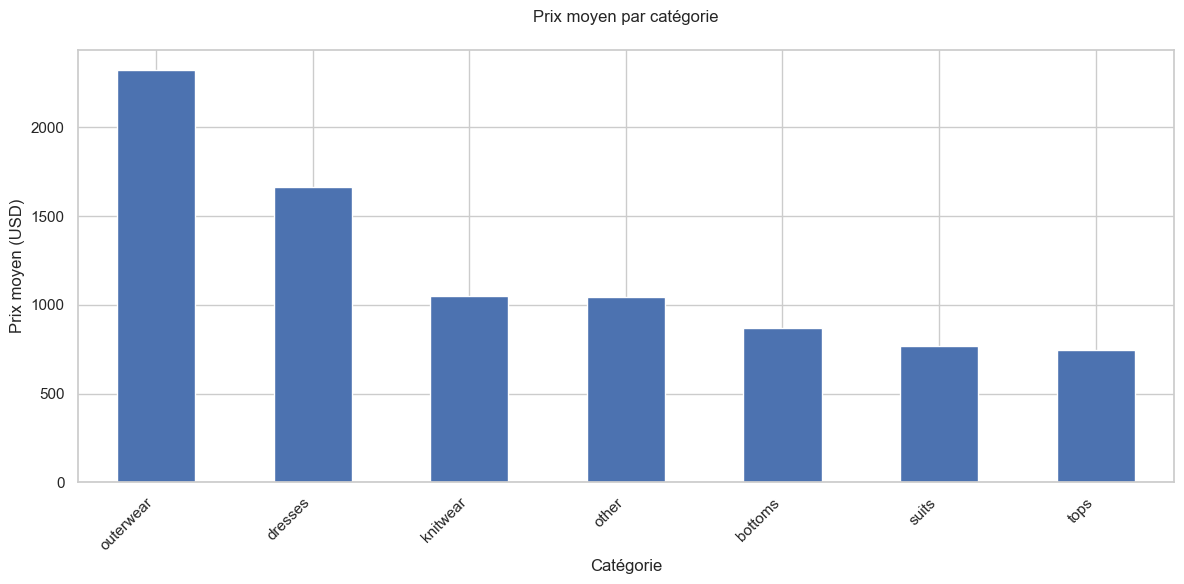

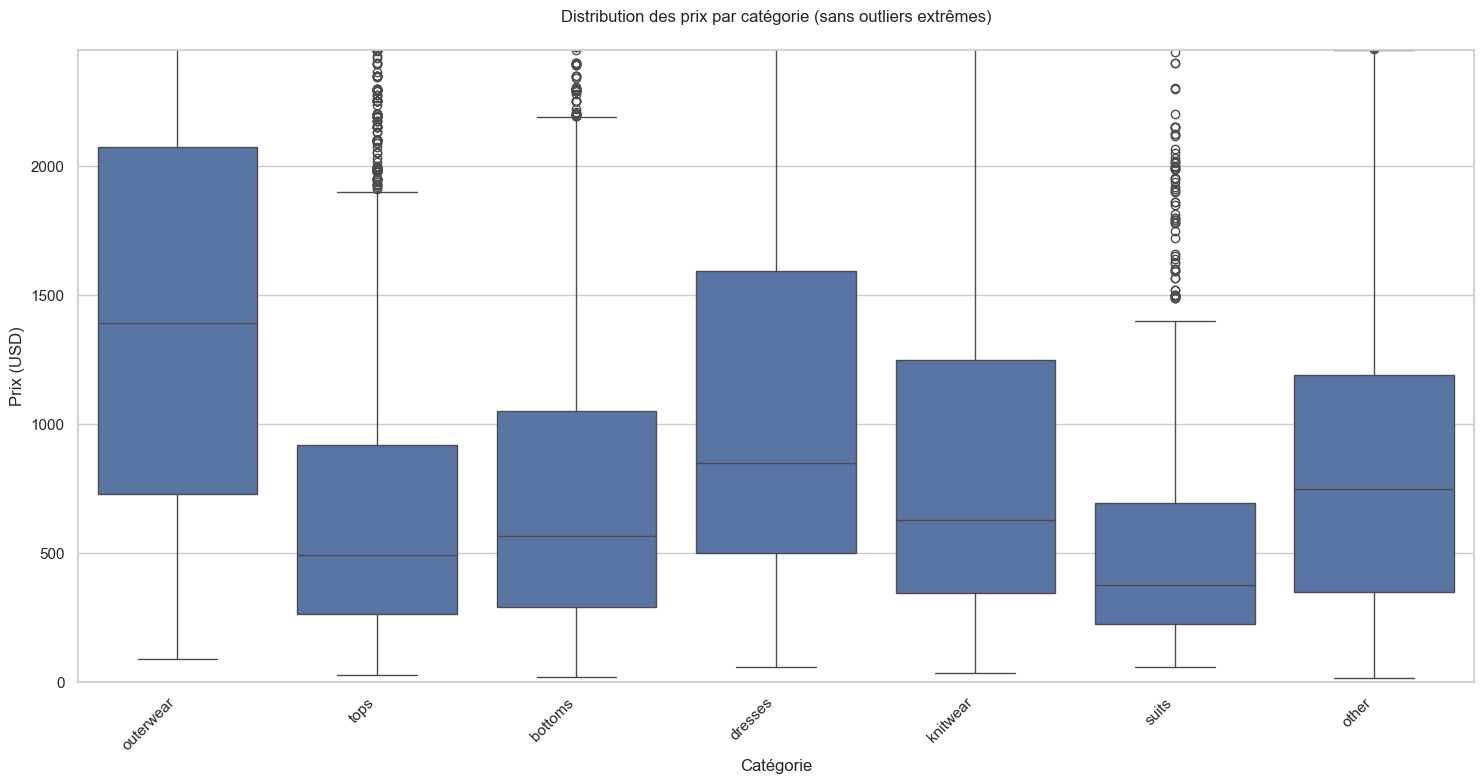


Statistiques principales:
Prix moyen (USD): 1197.80
Prix médian (USD): 780.00
Prix minimum (USD): 18
Prix maximum (USD): 21000
Nombre total de produits: 23161
Nombre de marques uniques: 490

Statistiques par catégorie:
           Nombre de produits  Prix moyen  Prix minimum  Prix maximum  \
category                                                                
bottoms                  3468      871.77            22         21000   
dresses                  4518     1663.07            58         21000   
knitwear                  629     1047.31            35         10825   
other                    8076     1043.67            18         10500   
outerwear                2087     2320.62            90         16500   
suits                     761      765.46            58         11000   
tops                     3622      743.30            30          8600   

           Nombre de marques  
category                      
bottoms                  319  
dresses                  315 

In [21]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")

# Chargement des données
df_nap = pd.read_csv('../data/text/net-a-porter.csv')

# 1. Distribution des prix
plt.figure(figsize=(12, 6))
sns.histplot(data=df_nap, x='price_usd', bins=30)
plt.title('Distribution des prix Net-a-Porter', pad=20)
plt.xlabel('Prix (USD)')
plt.ylabel('Nombre de produits')
plt.tight_layout()
plt.show()

# 2. Top 10 des marques par nombre de produits
plt.figure(figsize=(12, 6))
brand_counts = df_nap['brand'].value_counts()
plt.bar(range(len(brand_counts[:10])), brand_counts[:10])
plt.xticks(range(len(brand_counts[:10])), brand_counts[:10].index, rotation=45, ha='right')
plt.title('Top 10 des marques présentes', pad=20)
plt.xlabel('Marque')
plt.ylabel('Nombre de produits')
plt.tight_layout()
plt.show()

# 3. Prix moyen par marque (top 10 des marques les plus chères)
plt.figure(figsize=(12, 6))
avg_price_by_brand = df_nap.groupby('brand')['price_usd'].mean().sort_values(ascending=False).head(10)
avg_price_by_brand.plot(kind='bar')
plt.title('Prix moyen par marque (Top 10 des plus chères)', pad=20)
plt.xlabel('Marque')
plt.ylabel('Prix moyen (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Extraction des catégories depuis la description
def extract_category(description):
    description = description.lower()
    categories = {
        'dresses': ['dress', 'gown'],
        'tops': ['shirt', 't-shirt', 'sweater', 'top', 'tank', 'blouse'],
        'bottoms': ['pants', 'trousers', 'shorts', 'jeans', 'skirt'],
        'outerwear': ['jacket', 'coat', 'blazer'],
        'knitwear': ['knit', 'wool blend', 'cashmere'],
        'suits': ['suit'],
    }
    
    for category, keywords in categories.items():
        if any(keyword in description for keyword in keywords):
            return category
    return 'other'

df_nap['category'] = df_nap['description'].apply(extract_category)

# 5. Répartition des catégories de produits
plt.figure(figsize=(12, 8))
df_nap['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des catégories de produits', pad=20)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.tight_layout()
plt.show()

# 6. Prix moyen par catégorie
plt.figure(figsize=(12, 6))
avg_price_by_category = df_nap.groupby('category')['price_usd'].mean().sort_values(ascending=False)
avg_price_by_category.plot(kind='bar')
plt.title('Prix moyen par catégorie', pad=20)
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Box plot des prix par catégorie
plt.figure(figsize=(15, 8))

# Calcul des statistiques pour identifier les outliers extrêmes
Q1 = df_nap['price_usd'].quantile(0.25)
Q3 = df_nap['price_usd'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Création du DataFrame filtré
df_filtered = df_nap[df_nap['price_usd'] <= upper_bound]

# Plot avec limite sur l'axe y
ax = sns.boxplot(x='category', y='price_usd', data=df_filtered)
plt.title('Distribution des prix par catégorie (sans outliers extrêmes)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Catégorie')
plt.ylabel('Prix (USD)')

# Définir une limite pour l'axe y
y_limit = df_filtered['price_usd'].quantile(0.95)
plt.ylim(0, y_limit)

plt.tight_layout()
plt.show()

# Statistiques principales
stats_summary = {
    'Prix moyen (USD)': df_nap['price_usd'].mean(),
    'Prix médian (USD)': df_nap['price_usd'].median(),
    'Prix minimum (USD)': df_nap['price_usd'].min(),
    'Prix maximum (USD)': df_nap['price_usd'].max(),
    'Nombre total de produits': len(df_nap),
    'Nombre de marques uniques': df_nap['brand'].nunique()
}

print("\nStatistiques principales:")
for key, value in stats_summary.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

# Statistiques par catégorie
print("\nStatistiques par catégorie:")
category_stats = df_nap.groupby('category').agg({
    'price_usd': ['count', 'mean', 'min', 'max'],
    'brand': 'nunique'
}).round(2)
category_stats.columns = ['Nombre de produits', 'Prix moyen', 'Prix minimum', 'Prix maximum', 'Nombre de marques']
print(category_stats)

# Sauvegarde des statistiques
category_stats.to_csv('../data/text/net_a_porter_category_stats.csv')

ASOS

In [30]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")

# Chargement des données
df_asos = pd.read_csv('../data/text/products_asos_cleaned_full.csv')

# Nettoyage préliminaire du prix si nécessaire
df_asos['price'] = df_asos['price'].str.replace('£', '').str.replace('$', '').str.replace('€', '')
df_asos['price'] = pd.to_numeric(df_asos['price'], errors='coerce')

# Fonction pour regrouper les catégories
def simplify_category(category):
    category = str(category).lower()
    if 'dress' in category:
        return 'Dresses'
    elif any(word in category for word in ['top', 'shirt', 't-shirt', 'blouse']):
        return 'Tops'
    elif any(word in category for word in ['trouser', 'pant', 'jean', 'shorts']):
        return 'Bottoms'
    elif any(word in category for word in ['jacket', 'coat', 'blazer']):
        return 'Outerwear'
    elif any(word in category for word in ['shoe', 'sneaker', 'boot', 'sandal']):
        return 'Shoes'
    elif any(word in category for word in ['bag', 'purse', 'wallet']):
        return 'Accessories'
    elif 'swimwear' in category:
        return 'Swimwear'
    else:
        return 'Other'

# Ajouter la nouvelle colonne avec les catégories simplifiées
df_asos['main_category'] = df_asos['category'].apply(simplify_category)

# 1. Distribution des prix
plt.figure(figsize=(12, 6))
sns.histplot(data=df_asos, x='price', bins=30)
plt.title('Distribution des prix ASOS', pad=20)
plt.xlabel('Prix')
plt.ylabel('Nombre de produits')
plt.tight_layout()
plt.show()

# 2. Répartition des catégories principales
plt.figure(figsize=(15, 10))
df_asos['main_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des catégories principales de produits', pad=20)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.subplots_adjust(right=0.85)
plt.show()

# 3. Distribution des couleurs
plt.figure(figsize=(12, 6))
color_counts = df_asos['color'].value_counts().head(10)
plt.bar(range(len(color_counts)), color_counts)
plt.xticks(range(len(color_counts)), color_counts.index, rotation=45, ha='right')
plt.title('Top 10 des couleurs', pad=20)
plt.xlabel('Couleur')
plt.ylabel('Nombre de produits')
plt.tight_layout()
plt.show()

# 4. Prix moyen par catégorie principale
plt.figure(figsize=(12, 6))
avg_price_by_category = df_asos.groupby('main_category')['price'].mean().sort_values(ascending=False)
avg_price_by_category.plot(kind='bar')
plt.title('Prix moyen par catégorie', pad=20)
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Box plot des prix par catégorie
plt.figure(figsize=(15, 8))

# Calcul des statistiques pour identifier les outliers extrêmes
Q1 = df_asos['price'].quantile(0.25)
Q3 = df_asos['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Création du DataFrame filtré
df_filtered = df_asos[df_asos['price'] <= upper_bound]

# Plot avec limite sur l'axe y
ax = sns.boxplot(x='main_category', y='price', data=df_filtered)
plt.title('Distribution des prix par catégorie (sans outliers extrêmes)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Catégorie')
plt.ylabel('Prix')

# Définir une limite pour l'axe y
y_limit = df_filtered['price'].quantile(0.95)
plt.ylim(0, y_limit)
plt.tight_layout()
plt.show()


# Statistiques principales
stats_summary = {
    'Prix moyen': df_asos['price'].mean(),
    'Prix médian': df_asos['price'].median(),
    'Prix minimum': df_asos['price'].min(),
    'Prix maximum': df_asos['price'].max(),
    'Nombre total de produits': len(df_asos),
    'Nombre de catégories principales': df_asos['main_category'].nunique(),
    'Nombre de couleurs': df_asos['color'].nunique(),
    'Nombre de tailles': df_asos['size'].nunique()
}

print("\nStatistiques principales:")
for key, value in stats_summary.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

# Statistiques par catégorie principale
print("\nStatistiques par catégorie:")
category_stats = df_asos.groupby('main_category').agg({
    'price': ['count', 'mean', 'min', 'max'],
    'color': 'nunique',
    'size': 'nunique'
}).round(2)
category_stats.columns = ['Nombre de produits', 'Prix moyen', 'Prix minimum', 'Prix maximum', 
                         'Nombre de couleurs', 'Nombre de tailles']
print(category_stats)

# Sauvegarde des statistiques
category_stats.to_csv('../data/text/asos_category_stats.csv')

AttributeError: Can only use .str accessor with string values!

SSENSE Data

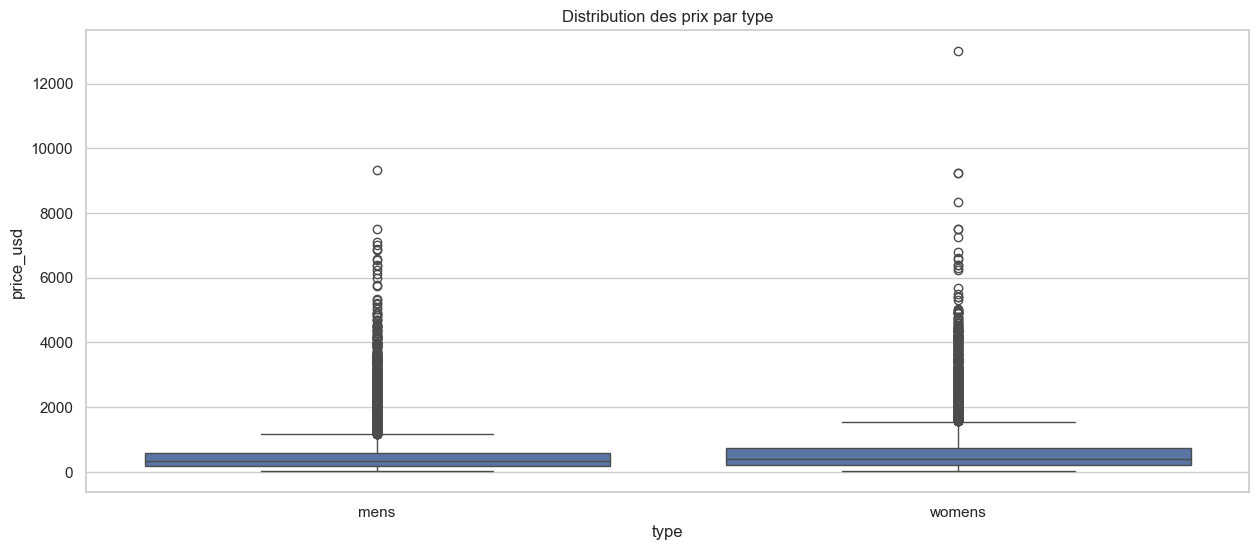

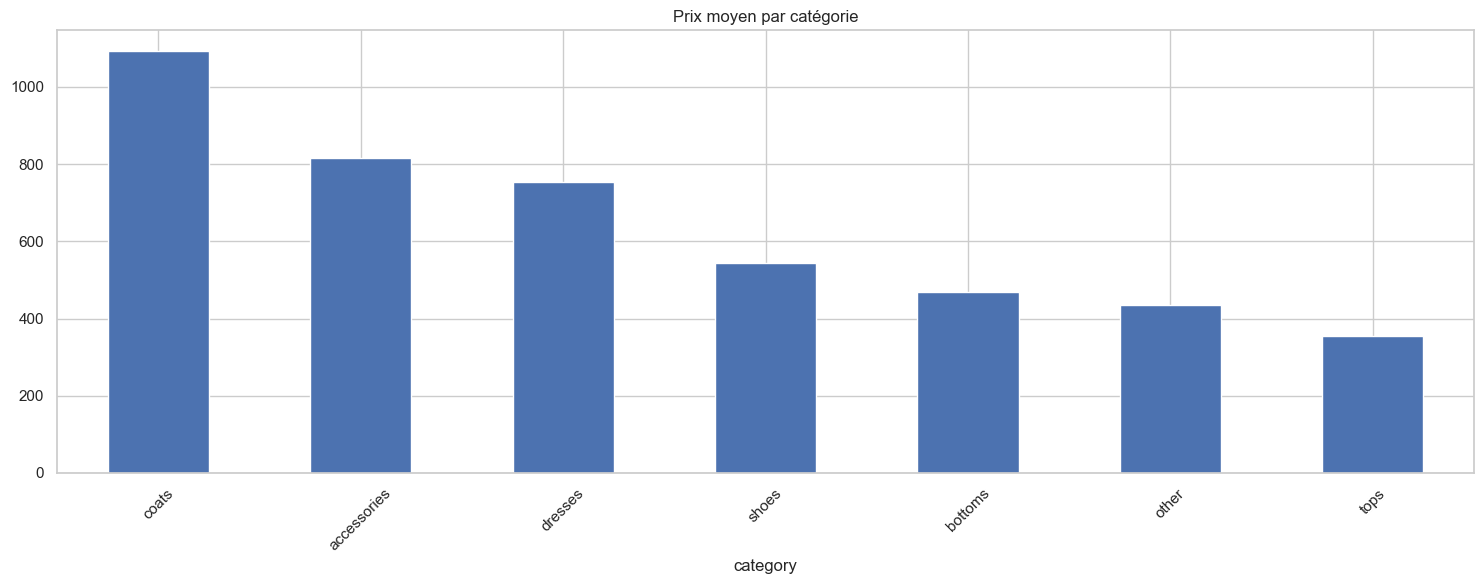

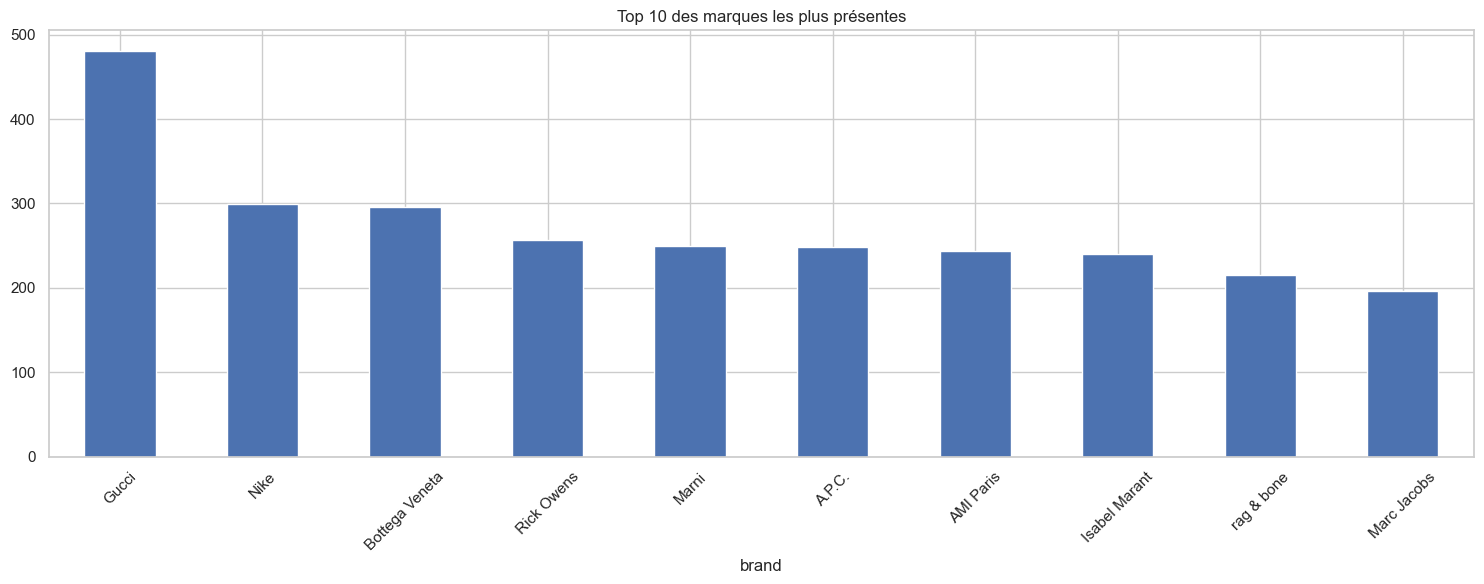

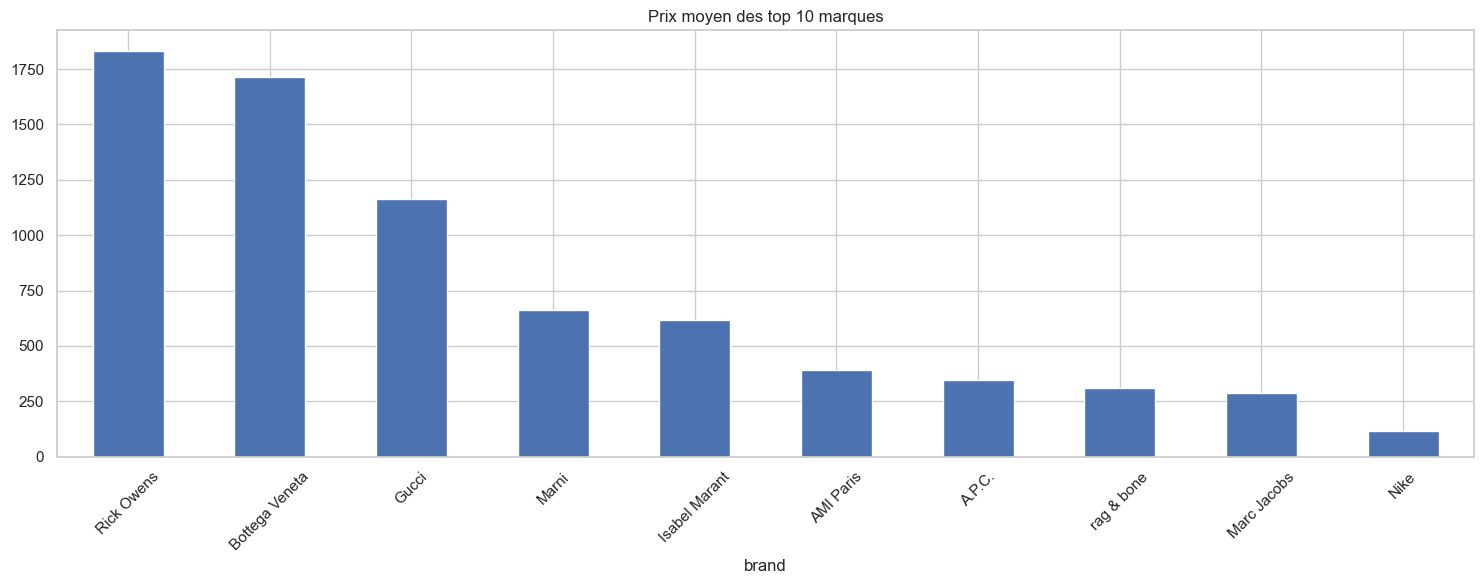


Statistiques générales:
Prix moyen: 559.21
Prix médian: 350.00
Prix minimum: 20
Prix maximum: 13000
Nombre total de produits: 19918
Nombre de marques: 631

Statistiques par catégorie:
             Nombre de produits  Prix moyen  Prix minimum  Prix maximum  \
category                                                                  
accessories                1180      814.78            39          4900   
bottoms                    2845      468.89            29          7000   
coats                      2886     1091.62            31         13000   
dresses                     550      753.11            46          4930   
other                      6757      435.64            20          6000   
shoes                      1671      542.57            44          7500   
tops                       4029      354.47            20          7100   

             Nombre de marques  
category                        
accessories                191  
bottoms                    428  
coats  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Chargement des données
df_ssense = pd.read_csv('../data/text/ssense_cleaned_full.csv', encoding='utf-8')

# Fonction pour extraire la catégorie depuis la description
def extract_category(description):
    description = str(description).lower()
    categories = {
        'coats': ['coat', 'jacket', 'blazer', 'down'],
        'tops': ['shirt', 't-shirt', 'sweater', 'top', 'blouse'],
        'bottoms': ['pants', 'trousers', 'jeans', 'shorts'],
        'dresses': ['dress', 'gown'],
        'accessories': ['bag', 'scarf', 'hat', 'wallet'],
        'shoes': ['sneakers', 'boots', 'shoes', 'sandals']
    }
    
    for category, keywords in categories.items():
        if any(keyword in description for keyword in keywords):
            return category
    return 'other'

# Ajouter la catégorie
df_ssense['category'] = df_ssense['description'].apply(extract_category)

# 1. Distribution des prix par type (mens/womens)
plt.figure(figsize=(15, 6))
sns.boxplot(x='type', y='price_usd', data=df_ssense)
plt.title('Distribution des prix par type')
plt.show()

# 2. Prix moyen par catégorie
plt.figure(figsize=(15, 6))
avg_price_by_category = df_ssense.groupby('category')['price_usd'].mean().sort_values(ascending=False)
avg_price_by_category.plot(kind='bar')
plt.title('Prix moyen par catégorie')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top 10 des marques les plus présentes
plt.figure(figsize=(15, 6))
top_brands = df_ssense['brand'].value_counts().head(10)
top_brands.plot(kind='bar')
plt.title('Top 10 des marques les plus présentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Prix moyen des top 10 marques
top_10_brands = df_ssense['brand'].value_counts().head(10).index
brand_avg_prices = df_ssense[df_ssense['brand'].isin(top_10_brands)].groupby('brand')['price_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
brand_avg_prices.plot(kind='bar')
plt.title('Prix moyen des top 10 marques')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistiques principales
print("\nStatistiques générales:")
stats = {
    'Prix moyen': df_ssense['price_usd'].mean(),
    'Prix médian': df_ssense['price_usd'].median(),
    'Prix minimum': df_ssense['price_usd'].min(),
    'Prix maximum': df_ssense['price_usd'].max(),
    'Nombre total de produits': len(df_ssense),
    'Nombre de marques': df_ssense['brand'].nunique()
}

for key, value in stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

# Statistiques par catégorie
print("\nStatistiques par catégorie:")
category_stats = df_ssense.groupby('category').agg({
    'price_usd': ['count', 'mean', 'min', 'max'],
    'brand': 'nunique'
}).round(2)
category_stats.columns = ['Nombre de produits', 'Prix moyen', 'Prix minimum', 'Prix maximum', 'Nombre de marques']
print(category_stats)

# Sauvegarde des statistiques
category_stats.to_csv('ssense_category_stats.csv')

Vestiaire Collectif

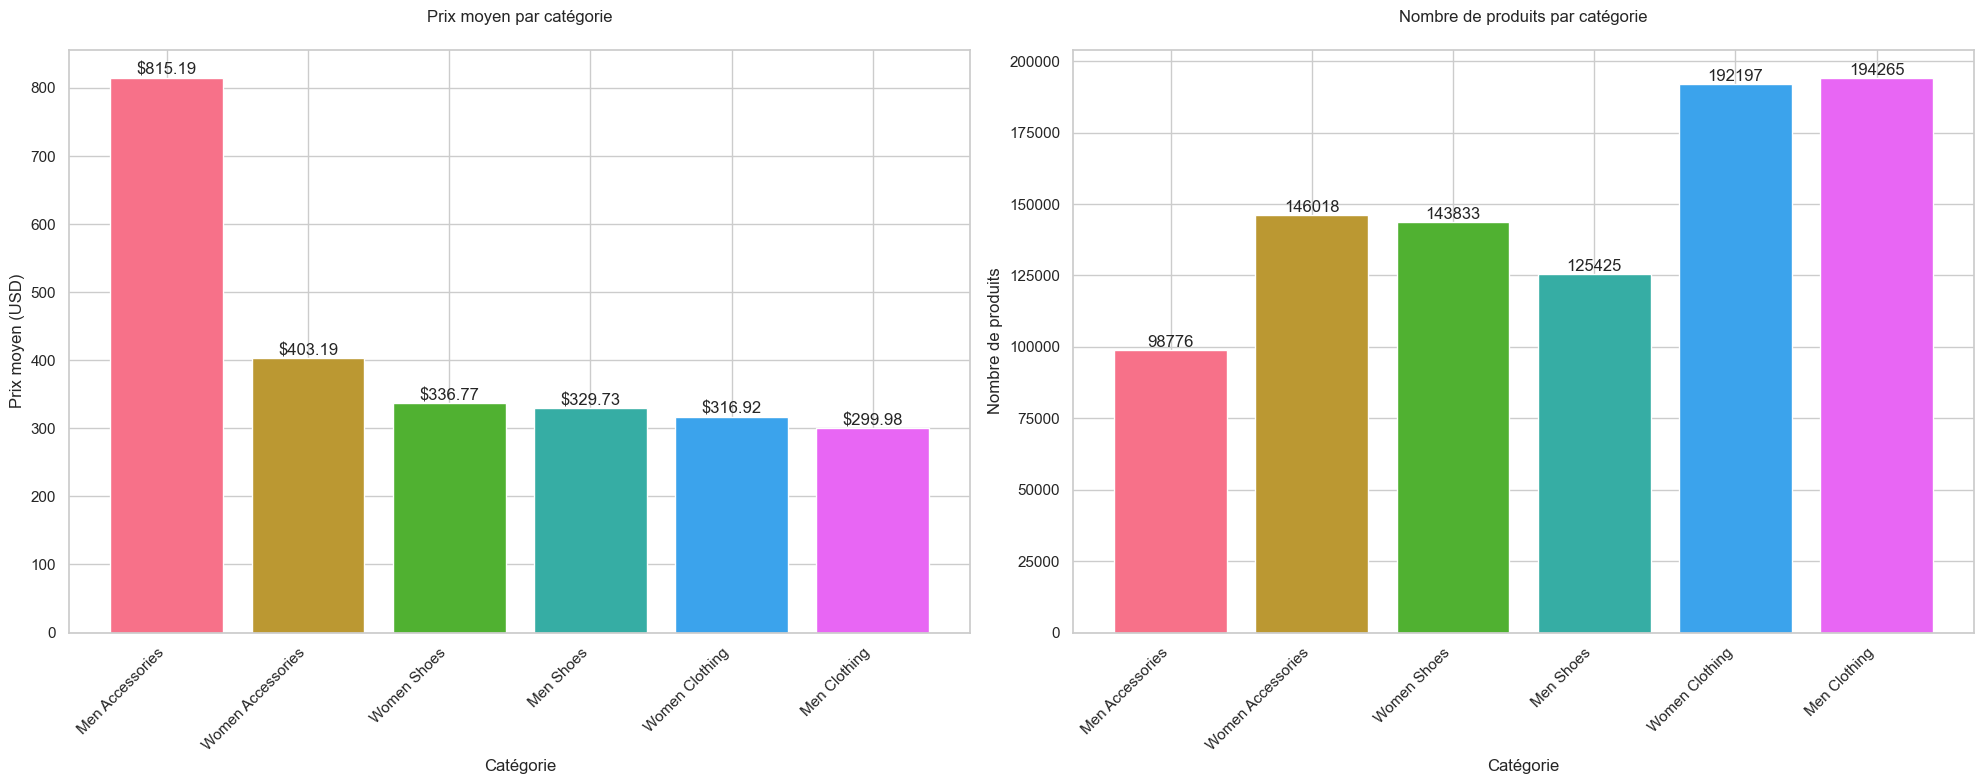

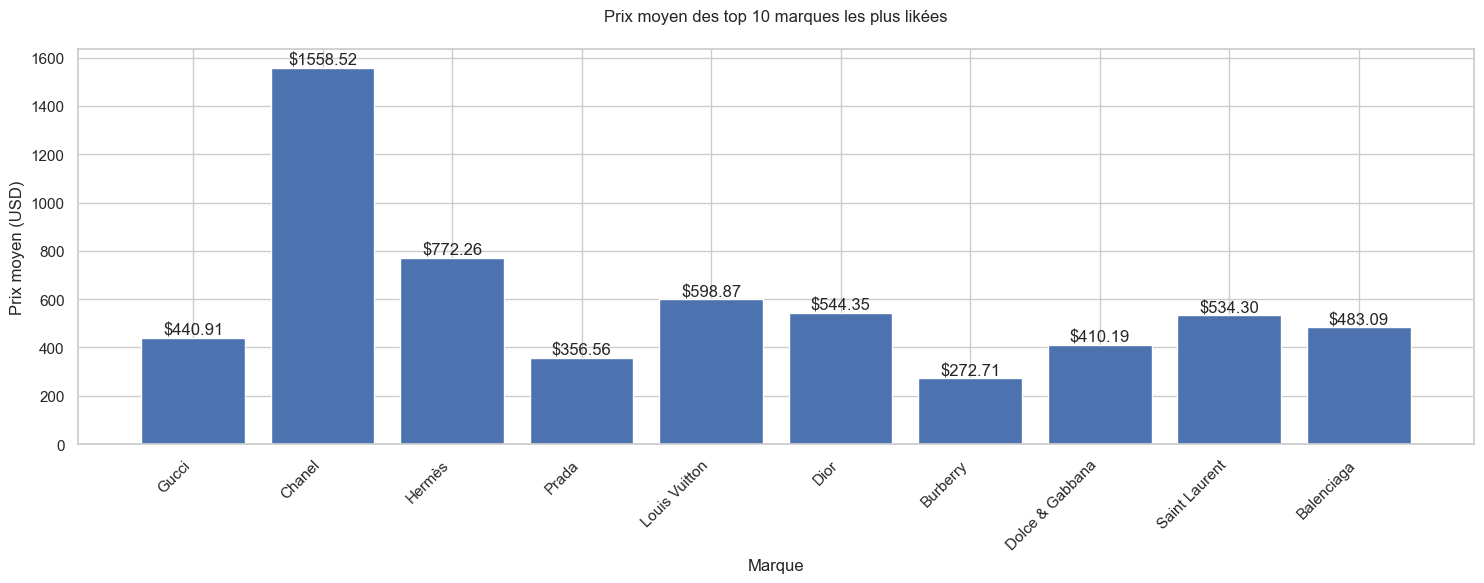


ANALYSE COMMERCIALE
--------------------------------------------------

1. INDICATEURS GLOBAUX
Prix moyen global: $386.86
Prix médian global: $168.70
Nombre total de produits: 900,514
Nombre de marques uniques: 8,884
Nombre total de likes: 5,671,731.0

2. TOP 10 DES MARQUES (par popularité)
                 Total Likes  Nombre de produits  Prix moyen  Prix minimum  \
brand_name                                                                   
Gucci               428174.0               41009      440.91         25.56   
Chanel              226499.0               15010     1558.52         24.20   
Hermès              222879.0               18711      772.26         22.06   
Prada               219247.0               20972      356.56         22.45   
Louis Vuitton       190624.0               18673      598.87         17.00   
Dior                160469.0               10492      544.35         24.28   
Burberry            130823.0               24018      272.71         20.00   
Dolce

/var/folders/vq/7f683s5n6990zmj58mg4vms40000gn/T/ipykernel_37707/728815018.py:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_stats = df.groupby('price_range').agg({
/var/folders/vq/7f683s5n6990zmj58mg4vms40000gn/T/ipykernel_37707/728815018.py:144: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='product_category', x='product_like_count',


             brand_name  product_like_count
price_range                                
0-100$           278383           1011474.0
100-500$         481816           3252133.0
500-1000$         91165            845275.0
1000$+            49150            562849.0

1. CATÉGORIES LES PLUS POPULAIRES
--------------------------------------------------


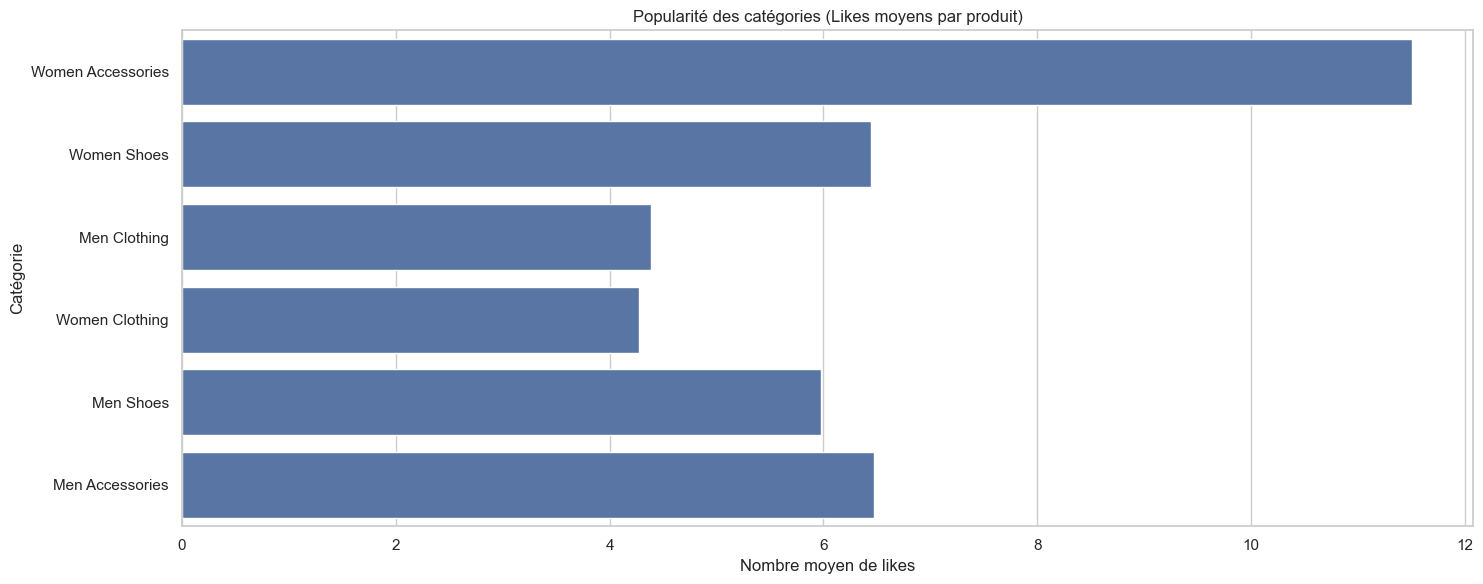


2. TENDANCES SAISONNIÈRES
--------------------------------------------------

Top catégories par saison:

Autumn / Winter:
                   product_like_count  sold  product_id
product_category                                       
Men Shoes                       14.22     0          99
Women Accessories               11.23    75       27674
Men Accessories                  6.93    38        9029

All seasons:
                   product_like_count  sold  product_id
product_category                                       
Women Accessories               11.56   524      117598
Men Accessories                  6.43   879       89598
Women Shoes                      6.31  3391      124686

Spring / Summer:
                   product_like_count  sold  product_id
product_category                                       
Women Accessories               13.13     2         746
Men Shoes                        8.45   127        6793
Women Shoes                      8.00   466       14027


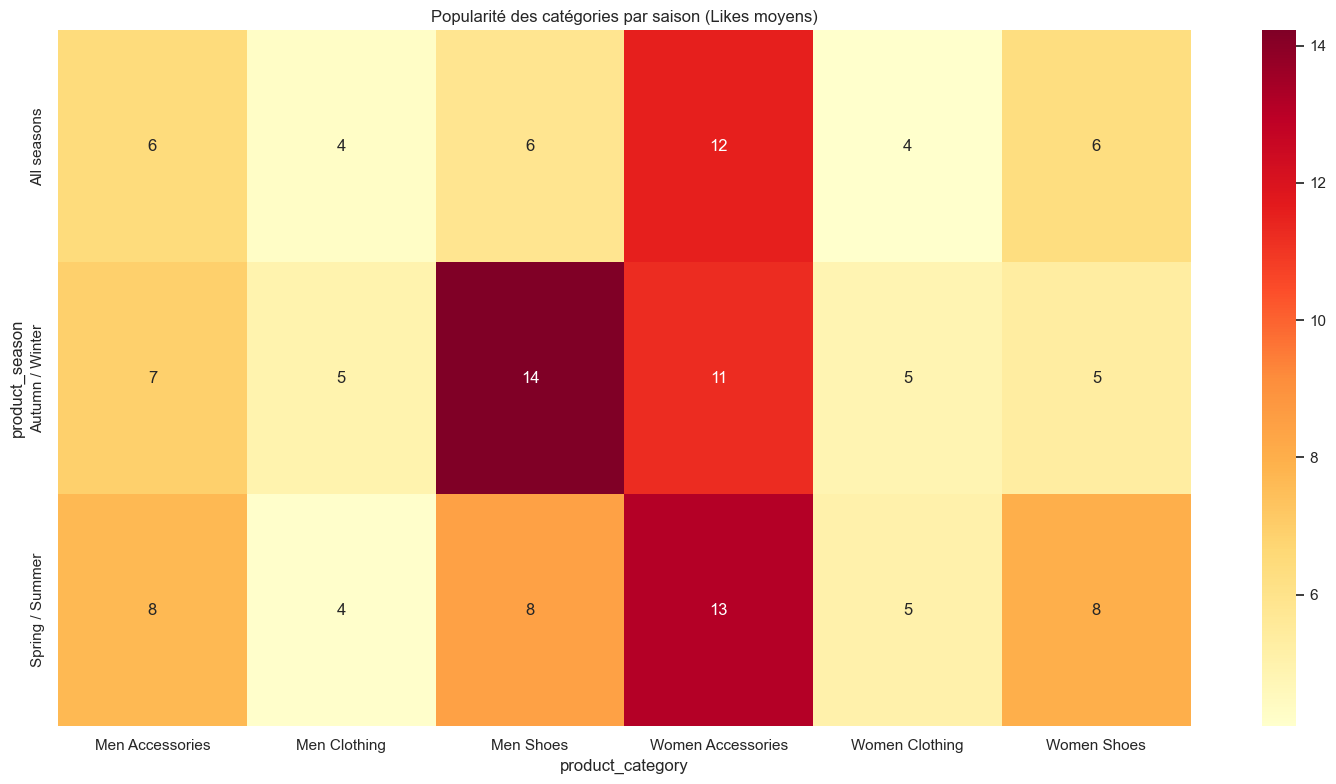


3. TENDANCES DES COULEURS
--------------------------------------------------

Top 10 des couleurs les plus populaires:
               product_like_count  sold  product_id
product_color                                      
White / Black          195.000000     0           1
Bordeaux                39.500000     0           4
silver/black            29.000000     0           1
Gold                    11.447209   206       17162
Silver                  10.258802   233       19258
Beige / Grey            10.000000     0           2
Metallic                 7.524024    52        3330
Pink                     7.424736   519       30280
Ecru                     7.222617   192        7322
camel                    7.000000     0           2


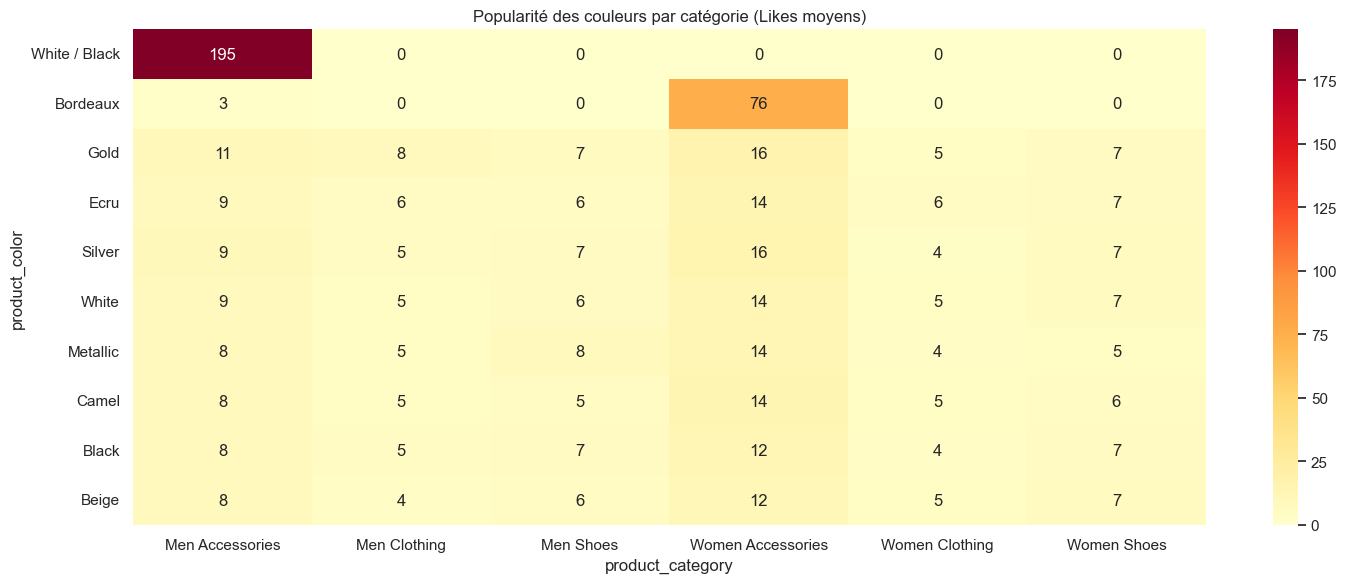


COMBINAISONS LES PLUS POPULAIRES
--------------------------------------------------

Top combinaisons catégorie-couleur-saison:
                                                 product_like_count  sold
product_category  product_color product_season                           
Men Accessories   White / Black All seasons                  195.00     0
Men Shoes         Green         Autumn / Winter               83.00     0
Women Accessories Bordeaux      All seasons                   76.00     0
Men Shoes         Metallic      Autumn / Winter               32.00     0
Women Accessories silver/black  All seasons                   29.00     0
Men Accessories   Burgundy      Spring / Summer               28.00     0
Men Shoes         Pink          Autumn / Winter               25.00     0
Women Accessories Ecru          Spring / Summer               21.31     0
                  Navy          Spring / Summer               20.36     0
                  Red           Spring / Summer          

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Chargement des données
df = pd.read_csv('../data/text/vestiaire_cleaned_full.csv')

# 1. Analyse des prix par catégorie de produit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Calcul des métriques par catégorie
price_metrics = df.groupby('product_category').agg({
    'price_usd': ['mean', 'count']
}).sort_values(('price_usd', 'mean'), ascending=False)

# Configuration des couleurs
colors = sns.color_palette("husl", len(price_metrics))

# Graphique du prix moyen par catégorie
bars1 = ax1.bar(range(len(price_metrics)), price_metrics['price_usd']['mean'], color=colors)
ax1.set_title('Prix moyen par catégorie', fontsize=12, pad=20)
ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Prix moyen (USD)')
ax1.set_xticks(range(len(price_metrics)))
ax1.set_xticklabels(price_metrics.index, rotation=45, ha='right')
ax1.grid(True, axis='y')

# Ajout des valeurs sur les barres
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

# Graphique de la distribution des produits par catégorie
bars2 = ax2.bar(range(len(price_metrics)), price_metrics['price_usd']['count'], color=colors)
ax2.set_title('Nombre de produits par catégorie', fontsize=12, pad=20)
ax2.set_xlabel('Catégorie')
ax2.set_ylabel('Nombre de produits')
ax2.set_xticks(range(len(price_metrics)))
ax2.set_xticklabels(price_metrics.index, rotation=45, ha='right')
ax2.grid(True, axis='y')

# Ajout des valeurs sur les barres
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Analyse des marques les plus populaires
plt.figure(figsize=(15, 6))
top_brands = df.groupby('brand_name').agg({
    'price_usd': ['mean', 'count'],
    'product_like_count': 'sum'
}).sort_values(('product_like_count', 'sum'), ascending=False).head(10)

ax = plt.gca()
bars = ax.bar(range(len(top_brands)), top_brands['price_usd']['mean'])
plt.title('Prix moyen des top 10 marques les plus likées', pad=20)
plt.xlabel('Marque')
plt.ylabel('Prix moyen (USD)')
plt.xticks(range(len(top_brands)), top_brands.index, rotation=45, ha='right')

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}',
            ha='center', va='bottom')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Statistiques détaillées
print("\nANALYSE COMMERCIALE")
print("-" * 50)

# 1. Statistiques globales
print("\n1. INDICATEURS GLOBAUX")
print(f"Prix moyen global: ${df['price_usd'].mean():.2f}")
print(f"Prix médian global: ${df['price_usd'].median():.2f}")
print(f"Nombre total de produits: {len(df):,}")
print(f"Nombre de marques uniques: {df['brand_name'].nunique():,}")
print(f"Nombre total de likes: {df['product_like_count'].sum():,}")

# 2. Top marques
print("\n2. TOP 10 DES MARQUES (par popularité)")
brand_stats = df.groupby('brand_name').agg({
    'product_like_count': 'sum',
    'price_usd': ['count', 'mean', 'min', 'max']
}).round(2)
brand_stats.columns = ['Total Likes', 'Nombre de produits', 'Prix moyen', 'Prix minimum', 'Prix maximum']
print(brand_stats.sort_values('Total Likes', ascending=False).head(10))

# 3. Statistiques par catégorie
print("\n3. ANALYSE PAR CATÉGORIE")
category_stats = df.groupby('product_category').agg({
    'price_usd': ['count', 'mean', 'min', 'max'],
    'brand_name': 'nunique',
    'product_like_count': 'sum'
}).round(2)
category_stats.columns = ['Nombre de produits', 'Prix moyen', 'Prix minimum', 'Prix maximum', 'Nombre de marques', 'Total Likes']
print(category_stats.sort_values('Total Likes', ascending=False))

# 4. Gammes de prix
print("\n4. RÉPARTITION PAR GAMME DE PRIX")
df['price_range'] = pd.cut(df['price_usd'], 
                          bins=[0, 100, 500, 1000, float('inf')],
                          labels=['0-100$', '100-500$', '500-1000$', '1000$+'])
price_range_stats = df.groupby('price_range').agg({
    'brand_name': 'count',
    'product_like_count': 'sum'
})
print(price_range_stats)


# 1. ANALYSE DES CATÉGORIES POPULAIRES
print("\n1. CATÉGORIES LES PLUS POPULAIRES")
print("-" * 50)

# Métriques par catégorie
category_metrics = df.groupby('product_category').agg({
    'product_like_count': ['sum', 'mean'],
    'sold': 'sum',
    'product_id': 'count'
}).round(2)

category_metrics.columns = ['Total Likes', 'Likes Moyens', 'Ventes', 'Nombre Produits']
category_popularity = category_metrics.sort_values('Total Likes', ascending=False)

# Visualisation des catégories populaires
plt.figure(figsize=(15, 6))
sns.barplot(data=df, y='product_category', x='product_like_count', 
            estimator=lambda x: sum(x)/len(x), ci=None,
            order=category_popularity.index)
plt.title('Popularité des catégories (Likes moyens par produit)')
plt.xlabel('Nombre moyen de likes')
plt.ylabel('Catégorie')
plt.tight_layout()
plt.show()

# 2. ANALYSE SAISONNIÈRE
print("\n2. TENDANCES SAISONNIÈRES")
print("-" * 50)

# Métriques par saison
season_metrics = df.groupby(['product_season', 'product_category']).agg({
    'product_like_count': 'mean',
    'sold': 'sum',
    'product_id': 'count'
}).round(2)

# Identifier les catégories les plus populaires par saison
season_trends = season_metrics.sort_values('product_like_count', ascending=False)
print("\nTop catégories par saison:")
for season in df['product_season'].unique():
    print(f"\n{season}:")
    print(season_trends.loc[season].head(3))

# Visualisation des tendances saisonnières
plt.figure(figsize=(15, 8))
seasonal_pivot = df.pivot_table(
    values='product_like_count',
    index='product_season',
    columns='product_category',
    aggfunc='mean'
)
sns.heatmap(seasonal_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Popularité des catégories par saison (Likes moyens)')
plt.tight_layout()
plt.show()

# 3. ANALYSE DES COULEURS
print("\n3. TENDANCES DES COULEURS")
print("-" * 50)

# Métriques par couleur
color_metrics = df.groupby(['product_color', 'product_category']).agg({
    'product_like_count': 'mean',
    'sold': 'sum',
    'product_id': 'count'
}).round(2)

# Top couleurs globales
top_colors = df.groupby('product_color').agg({
    'product_like_count': 'mean',
    'sold': 'sum',
    'product_id': 'count'
}).sort_values('product_like_count', ascending=False).head(10)

print("\nTop 10 des couleurs les plus populaires:")
print(top_colors)

# Visualisation des couleurs les plus populaires
plt.figure(figsize=(15, 6))
color_pivot = df.pivot_table(
    values='product_like_count',
    index='product_color',
    columns='product_category',
    aggfunc='mean'
).fillna(0)

# Sélectionner les top 10 couleurs pour la visualisation
top_10_colors = color_pivot.mean(axis=1).sort_values(ascending=False).head(10).index
color_pivot_filtered = color_pivot.loc[top_10_colors]

sns.heatmap(color_pivot_filtered, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Popularité des couleurs par catégorie (Likes moyens)')
plt.tight_layout()
plt.show()

# Statistiques croisées
print("\nCOMBINAISONS LES PLUS POPULAIRES")
print("-" * 50)

# Top combinaisons catégorie-couleur
top_combinations = df.groupby(['product_category', 'product_color', 'product_season']).agg({
    'product_like_count': 'mean',
    'sold': 'sum'
}).round(2)

print("\nTop combinaisons catégorie-couleur-saison:")
print(top_combinations.sort_values('product_like_count', ascending=False).head(10))